In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [77]:
# Carga de datos
df = pd.read_csv(r"../data/final/final_dataset.csv")
df.insert(0, 'status_inf', df.pop('status_inf'))
df = df.drop(columns=['conglome', 'vivienda','hogar','codperso','periodo','ocupinf_t1','ocupinf_t2','periodo'])
df

,status_inf,sexo,edad,estadocivil,tuvotrabajo,categoria_trabajador,trabajopara,registrosunat,cuentassunat,tipocontrato,...,electricidad,celular,internet,personas_ingresos,personas_hogar,pobreza,tiempotrabajo,alquiler,horastotales_sempasada,ingtrabw
0,0,2,47,2,1,3,2,99,99,1.0,...,1.0,1,0,2,5,3,12.000000,500,40,15491.0
1,1,1,57,1,1,2,99,2,1,99.0,...,1.0,1,0,3,5,3,38.000000,80,48,28505.0
2,0,1,29,6,1,3,2,99,99,1.0,...,1.0,1,0,4,5,3,4.250000,200,16,35810.0
3,0,1,26,6,1,3,2,99,99,2.0,...,1.0,1,0,4,5,3,0.416667,200,25,10779.0
4,0,1,67,2,1,2,99,2,2,99.0,...,1.0,1,0,3,4,3,40.000000,1000,58,23592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20033,1,1,61,2,1,2,99,2,2,99.0,...,1.0,1,1,4,7,3,17.000000,1000,60,24033.0
20034,0,1,56,2,1,4,6,1,1,1.0,...,1.0,1,1,4,6,3,30.000000,1000,48,73477.0
20035,0,1,29,6,1,3,2,99,99,2.0,...,1.0,1,1,4,6,3,2.000000,1000,42,42659.0
20036,0,1,31,2,1,4,5,1,1,2.0,...,1.0,1,0,2,6,3,0.250000,18,52,19657.0


In [78]:
print(df.info())
print("La distribución de la variable objetivo statu_inf es:")
print(df['status_inf'].value_counts())
print("La cantidad de preguntas de los datos originales (indep y objetivo) es",df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20038 entries, 0 to 20037
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status_inf               20038 non-null  int64  
 1   sexo                     20038 non-null  int64  
 2   edad                     20038 non-null  int64  
 3   estadocivil              20038 non-null  int64  
 4   tuvotrabajo              20038 non-null  int64  
 5   categoria_trabajador     20038 non-null  int64  
 6   trabajopara              20038 non-null  int64  
 7   registrosunat            20038 non-null  int64  
 8   cuentassunat             20038 non-null  int64  
 9   tipocontrato             20037 non-null  float64
 10  numpersonastrabajo       20038 non-null  int64  
 11  tuvootrotrabajo          20038 non-null  int64  
 12  normtrabaja              20038 non-null  int64  
 13  horas_normtrabaja        20038 non-null  int64  
 14  disponiblehorastrabaja

In [79]:
categoricas = ['sexo','estadocivil','tuvotrabajo','categoria_trabajador','trabajopara','registrosunat',
               'cuentassunat','tipocontrato','numpersonastrabajo','tuvootrotrabajo','normtrabaja',
               'disponiblehorastrabajar','deseaotrotrabajo','antepasadosconsidera','perteneceindig',
               'lenguamaterna','niveleduc','asiste_educ','usointernet','viviadistrito','padece_enfer',
               'sintoma_malestar','enfermedad','recaida','accidente','notuvoenf','essalud','seguroprivado',
               'eps','seguroffaa','sis','tipovivienda','materialparedes','materialpisos','materialtechos',
               'vivienda_status','viviendatitulo','agua_procedencia','agua_potable','conexionsshh','electricidad',
               'celular','internet','pobreza']
df_indep = df.drop(columns = ['status_inf'])
df_categoricas = df_indep[categoricas]
df_continuas = df_indep.drop(columns=categoricas)
print("Total de variables indep")
print(df_indep.shape[1])
print("La cantidad de variables indep categoricas:")
print(df_categoricas.shape[1])
print("La cantidad de variables indep continuas:")
print(df_continuas.shape[1])


Total de variables indep
54
La cantidad de variables indep categoricas:
44
La cantidad de variables indep continuas:
10


In [80]:
# Crear dummies a partir de las variables categóricas
df_categoricas_encoded = pd.get_dummies(df_categoricas, columns=categoricas, drop_first=True, dummy_na=False)
print('La cantidad de variables indep categóricas después de haberse convertido en dummies es:')
print(df_categoricas_encoded.shape[1])

La cantidad de variables indep categóricas después de haberse convertido en dummies es:
131


In [81]:
# El dataset final de variables independientes (categoricas convertidas a dummies + continuas)
df_indep_final = pd.concat([df_categoricas_encoded, df_continuas], axis=1)
print('La cantidad de variables indep totales (categoricas convertidas a dummies + continuas) es:')
print(df_indep_final.shape[1])


La cantidad de variables indep totales (categoricas convertidas a dummies + continuas) es:
141


In [82]:
df_indep_final

,sexo_2,estadocivil_2,estadocivil_3,estadocivil_4,estadocivil_5,estadocivil_6,tuvotrabajo_2,categoria_trabajador_2,categoria_trabajador_3,categoria_trabajador_4,...,edad,horas_normtrabaja,habitaciones,habitacionesdormir,personas_ingresos,personas_hogar,tiempotrabajo,alquiler,horastotales_sempasada,ingtrabw
0,True,True,False,False,False,False,False,False,True,False,...,47,40,5.0,3.0,2,5,12.000000,500,40,15491.0
1,False,False,False,False,False,False,False,True,False,False,...,57,48,1.0,0.0,3,5,38.000000,80,48,28505.0
2,False,False,False,False,False,True,False,False,True,False,...,29,40,4.0,3.0,4,5,4.250000,200,16,35810.0
3,False,False,False,False,False,True,False,False,True,False,...,26,25,4.0,3.0,4,5,0.416667,200,25,10779.0
4,False,True,False,False,False,False,False,True,False,False,...,67,58,6.0,3.0,3,4,40.000000,1000,58,23592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20033,False,True,False,False,False,False,False,True,False,False,...,61,60,6.0,5.0,4,7,17.000000,1000,60,24033.0
20034,False,True,False,False,False,False,False,False,False,True,...,56,48,7.0,6.0,4,6,30.000000,1000,48,73477.0
20035,False,False,False,False,False,True,False,False,True,False,...,29,42,7.0,6.0,4,6,2.000000,1000,42,42659.0
20036,False,True,False,False,False,False,False,False,False,True,...,31,52,3.0,1.0,2,6,0.250000,18,52,19657.0


In [119]:
df_indep_final_nostdtreatment=df_indep_final

##### Empezamos a realizar tratamiento estadístico (a partir del dataset de variables independientes (df_indep_final)):

In [84]:
# Filtrar variables con un gran número de faltantes
null_percent = df_indep_final.isnull().mean()*100
cols_null = null_percent[null_percent > 80 ].index
cols_validas = null_percent[null_percent <= 80 ].index
print(cols_null)
# df_null = df[cols_validas].copy()
# df_null.shape[1]

Index([], dtype='object')


In [85]:
# Para eliminar las variables con muy poca varianza (definido por el umbral)
varianzas = df_indep_final.var()
umbral = 0.01
vars_seleccionadas = varianzas[varianzas > umbral].index
vars_no_seleccionadas = varianzas[varianzas <= umbral].index

print("Las variables con varianza menor al umbral son:")
print(df_indep_final[vars_no_seleccionadas].nunique())
## print(df_indep_final[vars_seleccionadas].nunique())

df_indep_final=df_indep_final[vars_seleccionadas]

print("El nuevo número de variables del dataset de variables independientes es:")
print(df_indep_final.shape[1])

Las variables con varianza menor al umbral son:
categoria_trabajador_6    2
trabajopara_3             2
registrosunat_3           2
tipocontrato_3.0          2
tipocontrato_4.0          2
tipocontrato_5.0          2
lenguamaterna_3.0         2
lenguamaterna_6.0         2
lenguamaterna_7.0         2
lenguamaterna_8.0         2
tipovivienda_5.0          2
tipovivienda_6.0          2
tipovivienda_7.0          2
materialparedes_2.0       2
materialparedes_6.0       2
materialparedes_8.0       2
materialpisos_7.0         2
materialtechos_6.0        2
materialtechos_7.0        2
materialtechos_8.0        2
vivienda_status_5         2
vivienda_status_7         2
agua_procedencia_3        2
agua_procedencia_6        2
electricidad_3.0          2
dtype: int64
El nuevo número de variables del dataset de variables independientes es:
116


In [86]:
# Cálculo de la correlación entre variables y eliminar las más altas referente a un umbral (0.70):

corr_matrix = df_indep_final.corr().abs()

# 2. Seleccionamos la parte superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

print("Variables a eliminar por alta correlación (>0.70):")
print(to_drop)

df_indep_final = df_indep_final.drop(columns=to_drop)

print("Nuevo número de variables del dataset de variables independientes después de eliminas las que tienen una alta correlación:")
print(df_indep_final.shape[1])

Variables a eliminar por alta correlación (>0.70):
['trabajopara_99', 'registrosunat_2', 'registrosunat_99', 'cuentassunat_2', 'cuentassunat_99', 'tipocontrato_99.0', 'numpersonastrabajo_5', 'seguroffaa_2', 'viviendatitulo_99', 'agua_procedencia_2', 'conexionsshh_2', 'pobreza_3', 'habitacionesdormir', 'horastotales_sempasada']
Nuevo número de variables del dataset de variables independientes después de eliminas las que tienen una alta correlación:
102


In [96]:
df_model = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20038 entries, 0 to 20037
Columns: 103 entries, status_inf to ingtrabw
dtypes: bool(94), float64(3), int64(6)
memory usage: 3.2 MB


In [88]:
X = df_model.drop(columns=['status_inf'])
y = df_model['status_inf']

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [90]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(scale_pos_weight)

4.812182741116751


In [91]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                      scale_pos_weight = scale_pos_weight)
model.fit(X_train, y_train)

c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


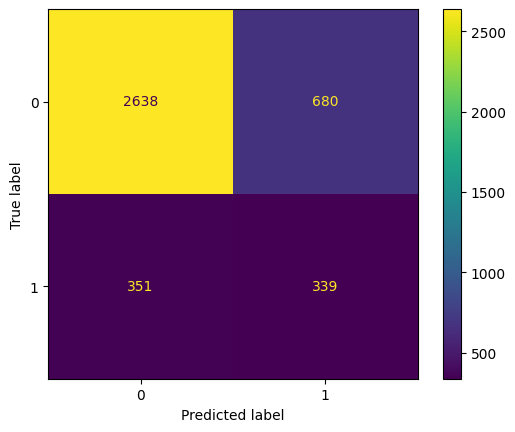

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

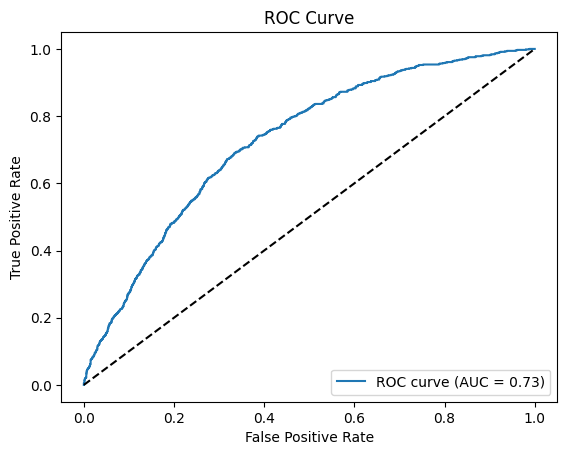

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [94]:
from sklearn.metrics import classification_report

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)

              precision    recall  f1-score   support

     Clase 0     0.8826    0.7951    0.8365      3318
     Clase 1     0.3327    0.4913    0.3967       690

    accuracy                         0.7428      4008
   macro avg     0.6076    0.6432    0.6166      4008
weighted avg     0.7879    0.7428    0.7608      4008



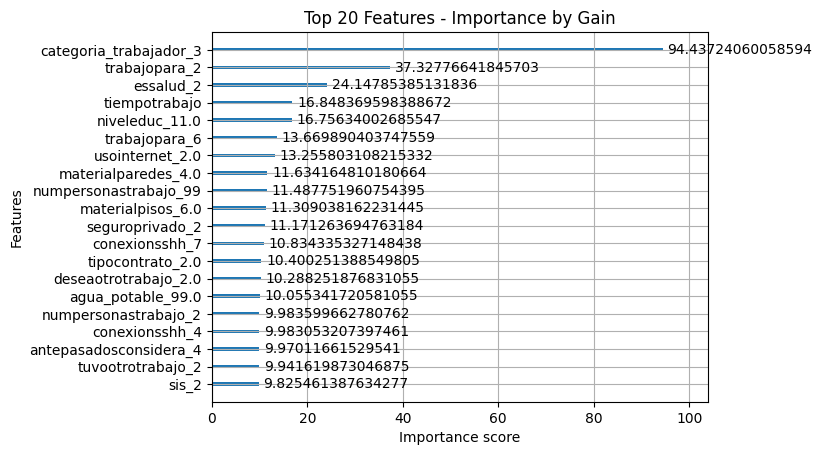

In [95]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Usamos el modelo ya entrenado
plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Features - Importance by Gain")
plt.show()

In [98]:
df_model = pd.concat([df[["status_inf"]], df_indep_final_nostdtreatment], axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20038 entries, 0 to 20037
Columns: 142 entries, status_inf to ingtrabw
dtypes: bool(131), float64(4), int64(7)
memory usage: 4.2 MB


In [99]:
X = df_model.drop(columns=['status_inf'])
y = df_model['status_inf']

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [101]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(scale_pos_weight)

4.812182741116751


In [102]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                      scale_pos_weight = scale_pos_weight)
model.fit(X_train, y_train)

c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


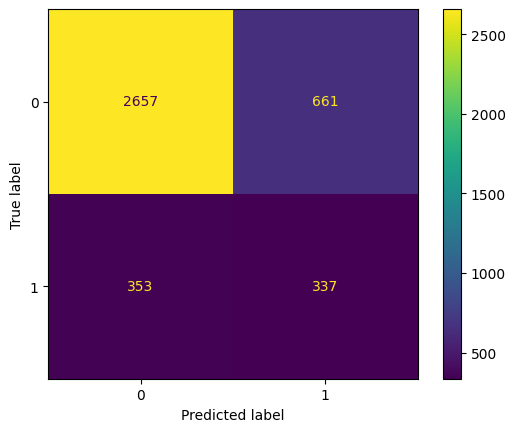

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

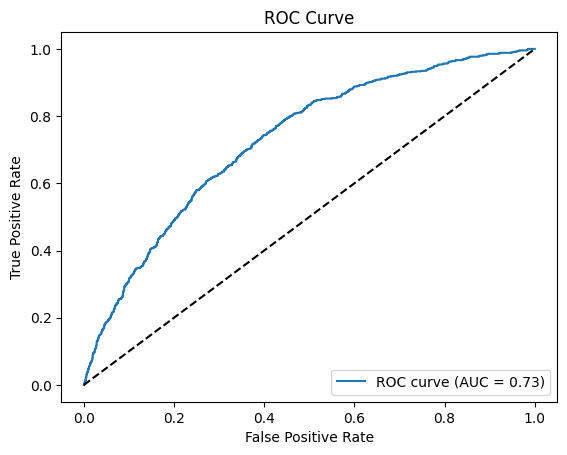

In [104]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [105]:
from sklearn.metrics import classification_report

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)

              precision    recall  f1-score   support

     Clase 0     0.8827    0.8008    0.8398      3318
     Clase 1     0.3377    0.4884    0.3993       690

    accuracy                         0.7470      4008
   macro avg     0.6102    0.6446    0.6195      4008
weighted avg     0.7889    0.7470    0.7639      4008



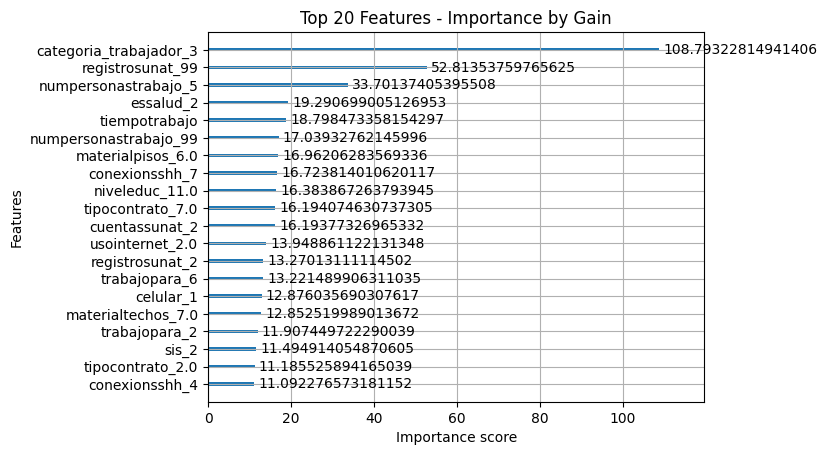

In [106]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Usamos el modelo ya entrenado
plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Features - Importance by Gain")
plt.show()

#### Corriendo ahora un Random Forest:

In [124]:
# Crear el nuevo DataFrame sin valores faltantes

df_model = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_model = df_model.dropna()


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      3284
           1       0.33      0.59      0.43       682

    accuracy                           0.73      3966
   macro avg       0.62      0.67      0.62      3966
weighted avg       0.80      0.73      0.75      3966



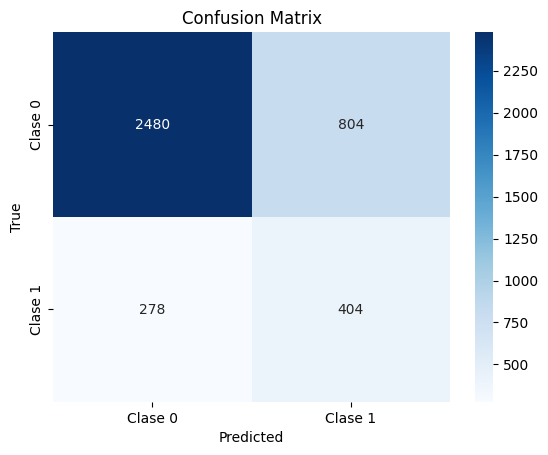

Accuracy: 0.7272


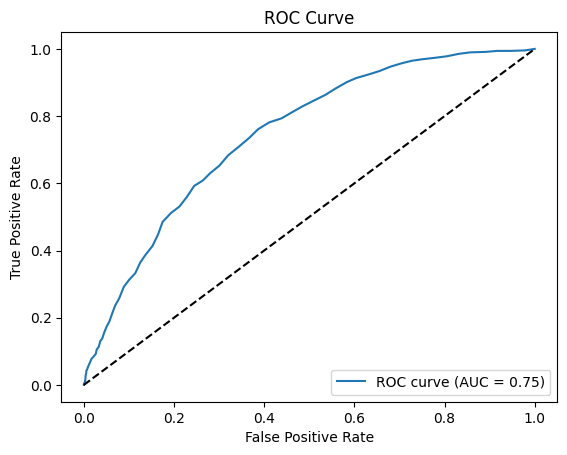

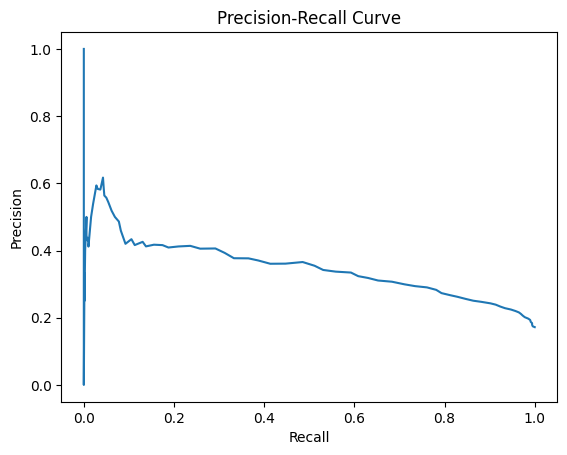

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Dividir el dataset en X (características) y y (variable objetivo)
X = df_model.drop(columns=['status_inf'])  # Eliminar la columna objetivo
y = df_model['status_inf']  # Columna objetivo

# 2. Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Usar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Crear y entrenar el modelo Random Forest con ajuste de pesos
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Ajuste de class_weight
rf_model.fit(X_train_resampled, y_train_resampled)

# 5. Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 6. Ajustar el umbral de decisión para mejorar recall de la clase 1
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
y_pred_adjusted = (y_proba > 0.3).astype(int)  # Ajustar el umbral de 0.5 a 0.3

# 7. Imprimir el reporte de clasificación (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

# 8. Matriz de confusión
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 9. Accuracy Score
accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f'Accuracy: {accuracy:.4f}')

# 10. Evaluación adicional con AUC-ROC y Precision-Recall Curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Graficar la curva Precision-Recall
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()